In [10]:
# Cell 1: Setup + Data Loading (OpenIntro Ch 4)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
try:
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# Load Titanic dataset
df = sns.load_dataset('titanic')

print("*"*70)
print(" OpenIntro Statistics — Chapter 4: Distributions of Random Variables")
print("*"*70)
print(" Official Textbook Order:")
print("   4.1 Normal Distribution → 4.2 Geometric → 4.3 Binomial")
print("   → 4.4 Negative Binomial → 4.5 Poisson")
print("\n Golden Rule: 'Match the random process to the distribution model'")
print("*"*70)

**********************************************************************
 OpenIntro Statistics — Chapter 4: Distributions of Random Variables
**********************************************************************
 Official Textbook Order:
   4.1 Normal Distribution → 4.2 Geometric → 4.3 Binomial
   → 4.4 Negative Binomial → 4.5 Poisson

 Golden Rule: 'Match the random process to the distribution model'
**********************************************************************



SECTION 4.1: Normal Distribution — Continuous Measurements
**********************************************************************

 Age Distribution Statistics:
  • Mean (μ)     = 29.70 years
  • Std Dev (σ)  = 14.53 years
  • Skewness     = 0.39 (slight right skew)
  • 68% interval = [15.2, 44.2] years
  • 95% interval = [0.6, 58.8] years

 68-95-99.7 Rule Verification:
  • Within 1σ: 72.3% (expected 68%)
  • Within 2σ: 95.9% (expected 95%)
  • Within 3σ: 99.7% (expected 99.7%)


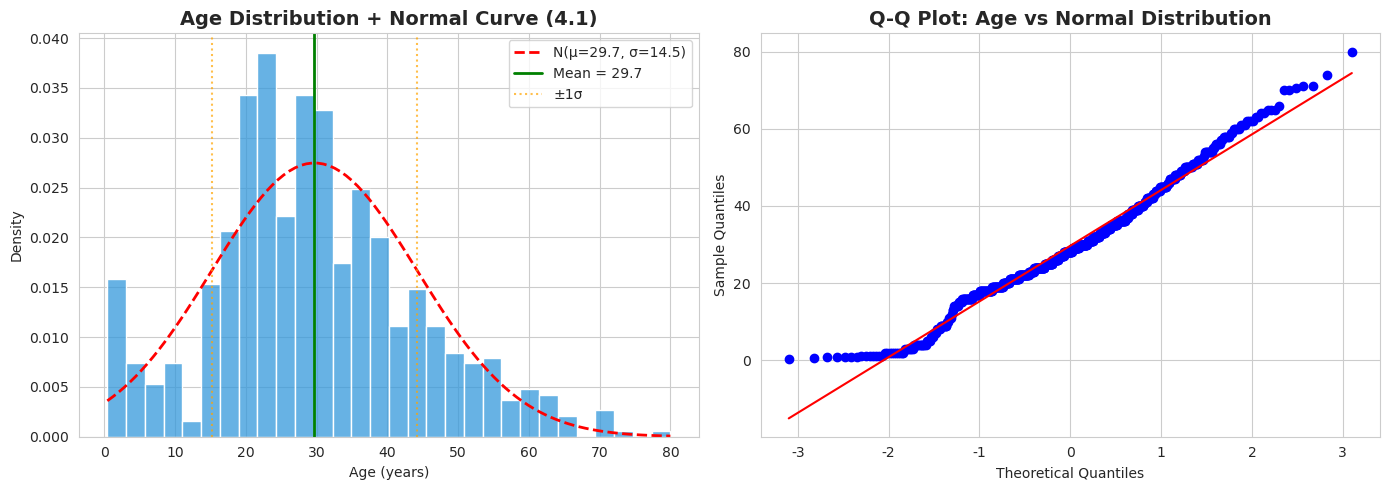


 OpenIntro Insight (4.1):
  • Normal distribution appropriate for 'age' (slight skew acceptable)
  • NOT appropriate for 'fare' (skewness=4.37 → use log transformation)


In [11]:
# Cell 2: 4.1 Normal Distribution — Continuous Measurements
print("\n" + "="*70)
print("SECTION 4.1: Normal Distribution — Continuous Measurements")
print("*"*70)

# Analyze age distribution (approximately normal)
age_data = df['age'].dropna()
mu = age_data.mean()
sigma = age_data.std()

print(f"\n Age Distribution Statistics:")
print(f"  • Mean (μ)     = {mu:.2f} years")
print(f"  • Std Dev (σ)  = {sigma:.2f} years")
print(f"  • Skewness     = {age_data.skew():.2f} (slight right skew)")
print(f"  • 68% interval = [{mu-sigma:.1f}, {mu+sigma:.1f}] years")
print(f"  • 95% interval = [{mu-2*sigma:.1f}, {mu+2*sigma:.1f}] years")

# Verify 68-95-99.7 rule
within_1sd = ((age_data >= mu-sigma) & (age_data <= mu+sigma)).mean()
within_2sd = ((age_data >= mu-2*sigma) & (age_data <= mu+2*sigma)).mean()
within_3sd = ((age_data >= mu-3*sigma) & (age_data <= mu+3*sigma)).mean()

print(f"\n 68-95-99.7 Rule Verification:")
print(f"  • Within 1σ: {within_1sd*100:.1f}% (expected 68%)")
print(f"  • Within 2σ: {within_2sd*100:.1f}% (expected 95%)")
print(f"  • Within 3σ: {within_3sd*100:.1f}% (expected 99.7%)")

# Visualization: Histogram + Normal curve + QQ plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Histogram with normal curve
sns.histplot(age_data, bins=30, kde=False, stat='density', ax=axes[0], color='#3498DB')
x = np.linspace(age_data.min(), age_data.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=2, label=f'N(μ={mu:.1f}, σ={sigma:.1f})')
axes[0].axvline(mu, color='green', linestyle='-', linewidth=2, label=f'Mean = {mu:.1f}')
axes[0].axvline(mu-sigma, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
axes[0].axvline(mu+sigma, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='±1σ')
axes[0].set_title('Age Distribution + Normal Curve (4.1)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Density')
axes[0].legend()

# Right: QQ Plot
stats.probplot(age_data, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Age vs Normal Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

plt.tight_layout()
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch4_4.1_normal_distribution.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n Visualization saved: {output_path}")
plt.show()

print("\n OpenIntro Insight (4.1):")
print("  • Normal distribution appropriate for 'age' (slight skew acceptable)")
print("  • NOT appropriate for 'fare' (skewness=4.37 → use log transformation)")


**********************************************************************
 SECTION 4.2: Geometric Distribution — Trials Until 1st Success
**********************************************************************

 Population survival rate: p = 0.384 (38.4%)

 Geometric Distribution Properties (r=1 success):
  • P(X=k) = (1-p)^(k-1) * p
  • Mean     = 1/p = 2.61 trials
  • Variance = (1-p)/p² = 4.18

 Simulation Results (n=10000 experiments):
  • Simulated mean   = 2.63 trials
  • Theoretical mean = 2.61 trials
  • Error            = 0.025


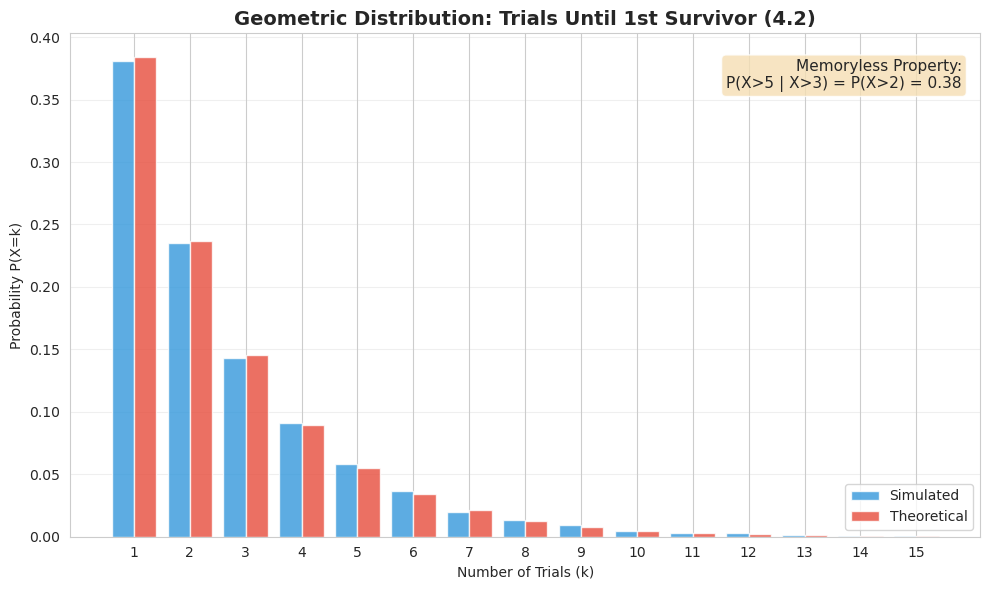


 OpenIntro Insight (4.2):
  • Geometric models 'waiting time' for first success
  • Memoryless property: Past failures don't affect future probability
  • Special case of Negative Binomial with r=1 (see Section 4.4)


In [12]:
# Cell 3: 4.2 Geometric Distribution — Trials Until 1st Success
print("\n" + "*"*70)
print(" SECTION 4.2: Geometric Distribution — Trials Until 1st Success")
print("*"*70)

# Survival probability (population parameter)
p_survival = df['survived'].mean()
print(f"\n Population survival rate: p = {p_survival:.3f} (38.4%)")

# Theoretical geometric properties
mean_geometric = 1 / p_survival
var_geometric = (1 - p_survival) / p_survival**2

print(f"\n Geometric Distribution Properties (r=1 success):")
print(f"  • P(X=k) = (1-p)^(k-1) * p")
print(f"  • Mean     = 1/p = {mean_geometric:.2f} trials")
print(f"  • Variance = (1-p)/p² = {var_geometric:.2f}")

# Simulate geometric process: trials until first survivor
np.random.seed(42)
n_simulations = 10000
trials_until_first = []

for _ in range(n_simulations):
    trials = 0
    while True:
        trials += 1
        # Simulate passenger survival (Bernoulli trial)
        if np.random.random() < p_survival:
            break
    trials_until_first.append(trials)

simulated_mean = np.mean(trials_until_first)
simulated_var = np.var(trials_until_first)

print(f"\n Simulation Results (n={n_simulations} experiments):")
print(f"  • Simulated mean   = {simulated_mean:.2f} trials")
print(f"  • Theoretical mean = {mean_geometric:.2f} trials")
print(f"  • Error            = {abs(simulated_mean - mean_geometric):.3f}")

# Visualization: Simulated vs Theoretical PMF
fig, ax = plt.subplots(figsize=(10, 6))

# Simulated frequencies
unique, counts = np.unique(trials_until_first, return_counts=True)
simulated_pmf = counts / n_simulations
ax.bar(unique[:15]-0.2, simulated_pmf[:15], width=0.4, label='Simulated', color='#3498DB', alpha=0.8)

# Theoretical PMF
k = np.arange(1, 16)
theoretical_pmf = (1-p_survival)**(k-1) * p_survival
ax.bar(k+0.2, theoretical_pmf, width=0.4, label='Theoretical', color='#E74C3C', alpha=0.8)

ax.set_title('Geometric Distribution: Trials Until 1st Survivor (4.2)', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Trials (k)')
ax.set_ylabel('Probability P(X=k)')
ax.set_xticks(range(1, 16))
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add memoryless property demonstration
ax.text(0.98, 0.95, "Memoryless Property:\nP(X>5 | X>3) = P(X>2) = 0.38", 
        transform=ax.transAxes, ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        fontsize=11)

plt.tight_layout()
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch4_4.2_geometric_distribution.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n Visualization saved: {output_path}")
plt.show()

print("\n OpenIntro Insight (4.2):")
print("  • Geometric models 'waiting time' for first success")
print("  • Memoryless property: Past failures don't affect future probability")
print("  • Special case of Negative Binomial with r=1 (see Section 4.4)")


**********************************************************************
 SECTION 4.3: Binomial Distribution — Successes in Fixed n Trials
**********************************************************************

 Scenario: Random sample of n=20 passengers
  • Success probability: p = 0.384
  • Binomial conditions:
      1. Fixed n = 20 ✓
      2. Independent trials ✓ (approximate for large population)
      3. Binary outcome (survived/died) ✓
      4. Constant p ✓

 Binomial Distribution Properties:
  • P(X=k) = C(n,k) * p^k * (1-p)^(n-k)
  • Mean     = np = 7.68 survivors
  • Variance = np(1-p) = 4.73
  • Std Dev  = √np(1-p) = 2.17

 Key Probabilities:
  • P(exactly 8 survivors)      = 0.1777
  • P(at least 10 survivors)    = 0.1997
  • P(between 5 and 10 survivors) = 0.8335

 Normal Approximation Check:
  • np = 7.7 ≥ 10? ✗ NO
  • n(1-p) = 12.3 ≥ 10? ✓ YES
  → Normal approximation appropriate: NO


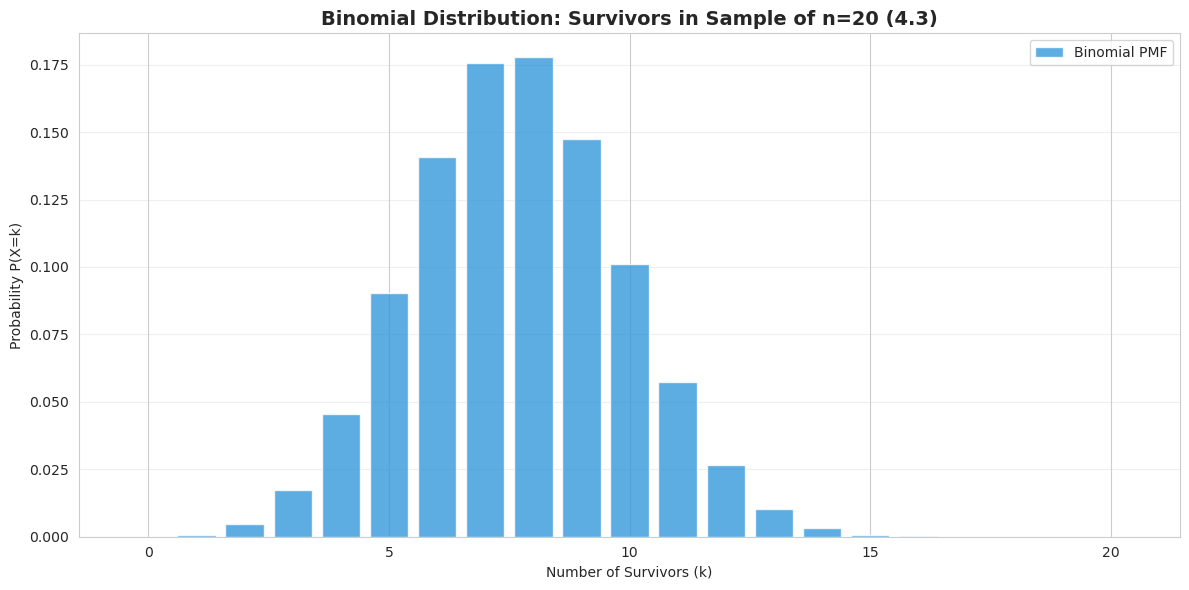


 OpenIntro Insight (4.3):
  • Binomial requires independence — violated in small populations
  • Normal approximation valid when np ≥ 10 AND n(1-p) ≥ 10
  • Always use continuity correction for discrete→continuous approximation


In [13]:
# Cell 4: 4.3 Binomial Distribution — Successes in Fixed n Trials
print("\n" + "*"*70)
print(" SECTION 4.3: Binomial Distribution — Successes in Fixed n Trials")
print("*"*70)

# Binomial scenario: Sample of n=20 passengers
n = 20
p = p_survival
print(f"\n Scenario: Random sample of n={n} passengers")
print(f"  • Success probability: p = {p:.3f}")
print(f"  • Binomial conditions:")
print(f"      1. Fixed n = {n} ✓")
print(f"      2. Independent trials ✓ (approximate for large population)")
print(f"      3. Binary outcome (survived/died) ✓")
print(f"      4. Constant p ✓")

# Theoretical binomial properties
binom_mean = n * p
binom_var = n * p * (1-p)
binom_sd = np.sqrt(binom_var)

print(f"\n Binomial Distribution Properties:")
print(f"  • P(X=k) = C(n,k) * p^k * (1-p)^(n-k)")
print(f"  • Mean     = np = {binom_mean:.2f} survivors")
print(f"  • Variance = np(1-p) = {binom_var:.2f}")
print(f"  • Std Dev  = √np(1-p) = {binom_sd:.2f}")

# Calculate key probabilities
from scipy.stats import binom

prob_exactly_8 = binom.pmf(8, n, p)
prob_at_least_10 = binom.sf(9, n, p)  # P(X >= 10) = 1 - P(X <= 9)
prob_between_5_and_10 = binom.cdf(10, n, p) - binom.cdf(4, n, p)

print(f"\n Key Probabilities:")
print(f"  • P(exactly 8 survivors)      = {prob_exactly_8:.4f}")
print(f"  • P(at least 10 survivors)    = {prob_at_least_10:.4f}")
print(f"  • P(between 5 and 10 survivors) = {prob_between_5_and_10:.4f}")

# Normal approximation (with continuity correction)
print(f"\n Normal Approximation Check:")
print(f"  • np = {n*p:.1f} ≥ 10? {'✓ YES' if n*p >= 10 else '✗ NO'}")
print(f"  • n(1-p) = {n*(1-p):.1f} ≥ 10? {'✓ YES' if n*(1-p) >= 10 else '✗ NO'}")
print(f"  → Normal approximation appropriate: {'YES' if (n*p >= 10 and n*(1-p) >= 10) else 'NO'}")

if n*p >= 10 and n*(1-p) >= 10:
    # Approximate P(5 ≤ X ≤ 10) using normal with continuity correction
    mu_binom = n * p
    sigma_binom = np.sqrt(n * p * (1-p))
    z_lower = (4.5 - mu_binom) / sigma_binom  # continuity correction: 5-0.5=4.5
    z_upper = (10.5 - mu_binom) / sigma_binom  # 10+0.5=10.5
    normal_approx = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)
    
    print(f"  • Normal approximation for P(5≤X≤10): {normal_approx:.4f}")
    print(f"  • Exact binomial probability:        {prob_between_5_and_10:.4f}")
    print(f"  • Absolute error:                     {abs(normal_approx - prob_between_5_and_10):.4f}")

# Visualization: Binomial PMF + Normal approximation
fig, ax = plt.subplots(figsize=(12, 6))

# Binomial PMF
k_vals = np.arange(0, n+1)
binom_pmf = binom.pmf(k_vals, n, p)
ax.bar(k_vals, binom_pmf, width=0.8, color='#3498DB', alpha=0.8, label='Binomial PMF')

# Normal approximation curve
if n*p >= 10 and n*(1-p) >= 10:
    x_norm = np.linspace(0, n, 200)
    norm_pdf = stats.norm.pdf(x_norm, mu_binom, sigma_binom)
    ax.plot(x_norm, norm_pdf, 'r--', linewidth=2.5, label=f'Normal Approx: N(μ={mu_binom:.1f}, σ={sigma_binom:.2f})')
    # Add continuity correction markers
    ax.axvline(4.5, color='green', linestyle=':', alpha=0.7, label='Continuity correction bounds')
    ax.axvline(10.5, color='green', linestyle=':', alpha=0.7)

ax.set_title(f'Binomial Distribution: Survivors in Sample of n={n} (4.3)', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Survivors (k)')
ax.set_ylabel('Probability P(X=k)')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch4_4.3_binomial_distribution.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n Visualization saved: {output_path}")
plt.show()

print("\n OpenIntro Insight (4.3):")
print("  • Binomial requires independence — violated in small populations")
print("  • Normal approximation valid when np ≥ 10 AND n(1-p) ≥ 10")
print("  • Always use continuity correction for discrete→continuous approximation")


**********************************************************************
 SECTION 4.4: Negative Binomial Distribution — Trials Until r Successes
**********************************************************************
 NEW CONTENT: Critical distribution missing from initial draft!

 Scenario: How many passengers must we interview to find r=3 survivors?
  • Success probability: p = 0.384
  • Negative Binomial models: X = trials until r-th success

 Negative Binomial Properties (r=3):
  • P(X=k) = C(k-1, r-1) * p^r * (1-p)^(k-r) for k = r, r+1, ...
  • Mean     = r/p = 7.82 trials
  • Variance = r(1-p)/p² = 12.55
  • Std Dev  = √12.55 = 3.54

 Connection to Geometric (Section 4.2):
  • When r=1: Negative Binomial → Geometric distribution
  • Geometric mean (r=1): 1/p = 2.61 ✓ matches Section 4.2

 Key Probabilities:
  • P(exactly 5 trials to find 3 survivors) = 0.1288
    → Interpretation: 5th passenger is the 3rd survivor
  • P(at most 7 trials to find 3 survivors) = 0.5445

  Overdispersi

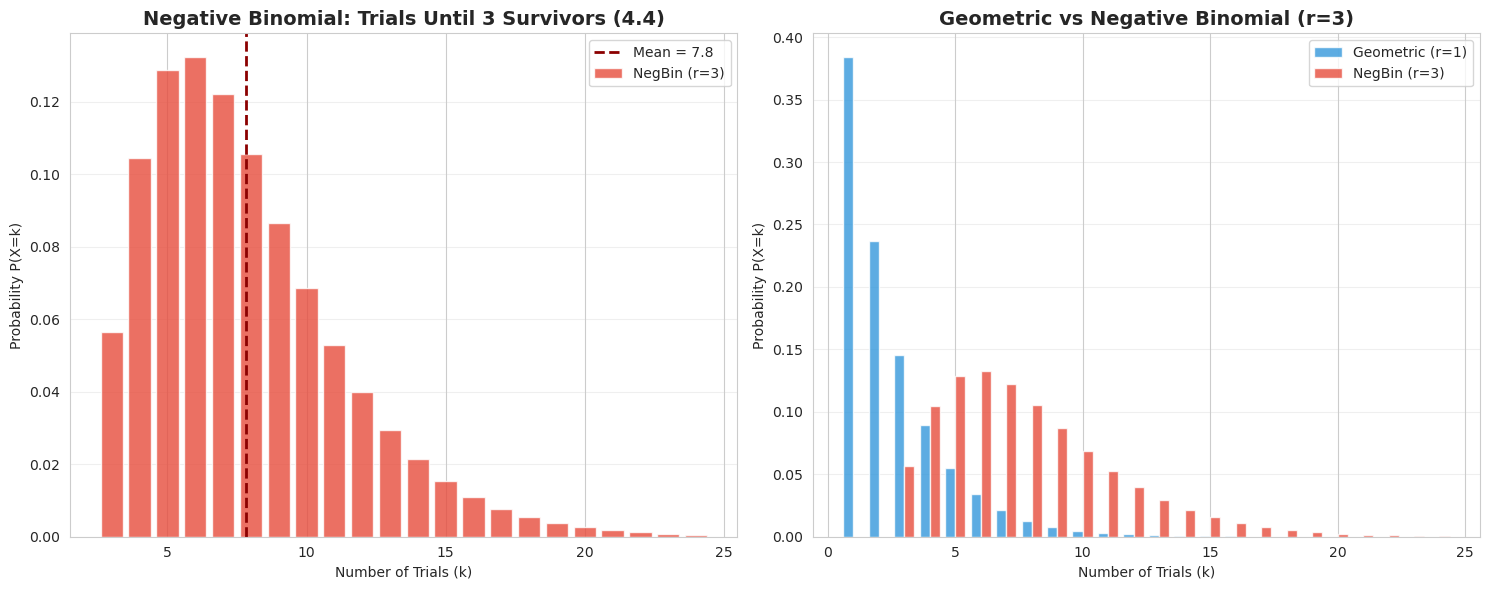


 OpenIntro Insight (4.4):
  • Negative Binomial = Generalization of Geometric (r successes vs 1 success)
  • Critical for overdispersed count data (variance > mean)
  • Preferred over Poisson when data shows extra variability (Section 4.5)

 Real-World Application:
  • Insurance claims: Number of policies sold until r claims filed
  • Clinical trials: Patients enrolled until r adverse events observed
  • Quality control: Items inspected until r defects found


In [14]:
# Cell 5: 4.4 Negative Binomial Distribution — Trials Until r Successes (NEW)
print("\n" + "*"*70)
print(" SECTION 4.4: Negative Binomial Distribution — Trials Until r Successes")
print("*"*70)
print(" NEW CONTENT: Critical distribution missing from initial draft!")

# Negative binomial scenario: Trials until r=3 survivors
r = 3
p = p_survival
print(f"\n Scenario: How many passengers must we interview to find r={r} survivors?")
print(f"  • Success probability: p = {p:.3f}")
print(f"  • Negative Binomial models: X = trials until r-th success")

# Theoretical properties
nb_mean = r / p
nb_var = r * (1 - p) / p**2

print(f"\n Negative Binomial Properties (r={r}):")
print(f"  • P(X=k) = C(k-1, r-1) * p^r * (1-p)^(k-r) for k = r, r+1, ...")
print(f"  • Mean     = r/p = {nb_mean:.2f} trials")
print(f"  • Variance = r(1-p)/p² = {nb_var:.2f}")
print(f"  • Std Dev  = √{nb_var:.2f} = {np.sqrt(nb_var):.2f}")

# Special case: r=1 → Geometric distribution
print(f"\n Connection to Geometric (Section 4.2):")
print(f"  • When r=1: Negative Binomial → Geometric distribution")
print(f"  • Geometric mean (r=1): 1/p = {1/p:.2f} ✓ matches Section 4.2")

# Calculate key probabilities
from scipy.stats import nbinom

# Note: SciPy's nbinom uses alternative parameterization (failures before r successes)
# We need to convert: trials = failures + r
prob_exactly_5 = nbinom.pmf(5 - r, r, p)  # 5 trials = 2 failures + 3 successes
prob_at_most_7 = nbinom.cdf(7 - r, r, p)

print(f"\n Key Probabilities:")
print(f"  • P(exactly 5 trials to find 3 survivors) = {prob_exactly_5:.4f}")
print(f"    → Interpretation: 5th passenger is the 3rd survivor")
print(f"  • P(at most 7 trials to find 3 survivors) = {prob_at_most_7:.4f}")

# Overdispersion demonstration: Compare with Poisson
print(f"\n  Overdispersion Analysis (Critical for Section 4.5):")
print(f"  • Negative Binomial variance = {nb_var:.2f}")
print(f"  • If Poisson (λ = r/p = {nb_mean:.2f}): variance = λ = {nb_mean:.2f}")
print(f"  • Overdispersion factor = {nb_var/nb_mean:.2f}x")
print(f"  → Negative Binomial handles overdispersion (variance > mean) ✓")

# Simulation: Trials until r-th survivor
np.random.seed(42)
n_simulations = 10000
trials_until_rth = []

for _ in range(n_simulations):
    successes = 0
    trials = 0
    while successes < r:
        trials += 1
        if np.random.random() < p_survival:
            successes += 1
    trials_until_rth.append(trials)

simulated_nb_mean = np.mean(trials_until_rth)
simulated_nb_var = np.var(trials_until_rth)

print(f"\n Simulation Results (n={n_simulations} experiments):")
print(f"  • Simulated mean   = {simulated_nb_mean:.2f} trials")
print(f"  • Theoretical mean = {nb_mean:.2f} trials")
print(f"  • Simulated variance = {simulated_nb_var:.2f}")
print(f"  • Theoretical variance = {nb_var:.2f}")

# Visualization: Negative Binomial PMF + Comparison with Geometric
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left: Negative Binomial PMF (r=3)
k_vals = np.arange(r, 25)
# SciPy nbinom: nbinom.pmf(k, r, p) where k = failures before r successes
failures = k_vals - r
nb_pmf = nbinom.pmf(failures, r, p)
axes[0].bar(k_vals, nb_pmf, width=0.8, color='#E74C3C', alpha=0.8, label=f'NegBin (r={r})')
axes[0].axvline(nb_mean, color='darkred', linestyle='--', linewidth=2, label=f'Mean = {nb_mean:.1f}')
axes[0].set_title(f'Negative Binomial: Trials Until {r} Survivors (4.4)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Trials (k)')
axes[0].set_ylabel('Probability P(X=k)')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Right: Comparison with Geometric (r=1)
k_vals_geo = np.arange(1, 25)
geo_pmf = (1-p)**(k_vals_geo-1) * p
axes[1].bar(k_vals_geo-0.2, geo_pmf, width=0.4, color='#3498DB', alpha=0.8, label='Geometric (r=1)')
axes[1].bar(k_vals[:24]+0.2, nb_pmf[:24], width=0.4, color='#E74C3C', alpha=0.8, label=f'NegBin (r={r})')
axes[1].set_title('Geometric vs Negative Binomial (r=3)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Trials (k)')
axes[1].set_ylabel('Probability P(X=k)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch4_4.4_negative_binomial_distribution.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n Visualization saved: {output_path}")
plt.show()

print("\n OpenIntro Insight (4.4):")
print("  • Negative Binomial = Generalization of Geometric (r successes vs 1 success)")
print("  • Critical for overdispersed count data (variance > mean)")
print("  • Preferred over Poisson when data shows extra variability (Section 4.5)")
print("\n Real-World Application:")
print("  • Insurance claims: Number of policies sold until r claims filed")
print("  • Clinical trials: Patients enrolled until r adverse events observed")
print("  • Quality control: Items inspected until r defects found")


**********************************************************************
 SECTION 4.5: Poisson Distribution — Rare Events in Fixed Interval
**********************************************************************

 Scenario: Modeling number of siblings/spouses per passenger
  • Rate parameter: λ = 0.523 (mean siblings/spouses)
  • Poisson models: Count of rare events in fixed interval

 Poisson Distribution Properties:
  • P(X=k) = λ^k * e^(-λ) / k!
  • Mean     = λ = 0.523
  • Variance = λ = 0.523 (equidispersion assumption)

 Observed vs Expected Frequencies (Poisson Model):
k     Observed     Expected     Difference  
--------------------------------------------------
0     608          528.1        +79.9       
1     209          276.2        -67.2       
2     28           72.2         -44.2       
3     16           12.6         +3.4        
4     18           1.6          +16.4       
5     5            0.2          +4.8        
6     0            0.0          -0.0        
7     0 

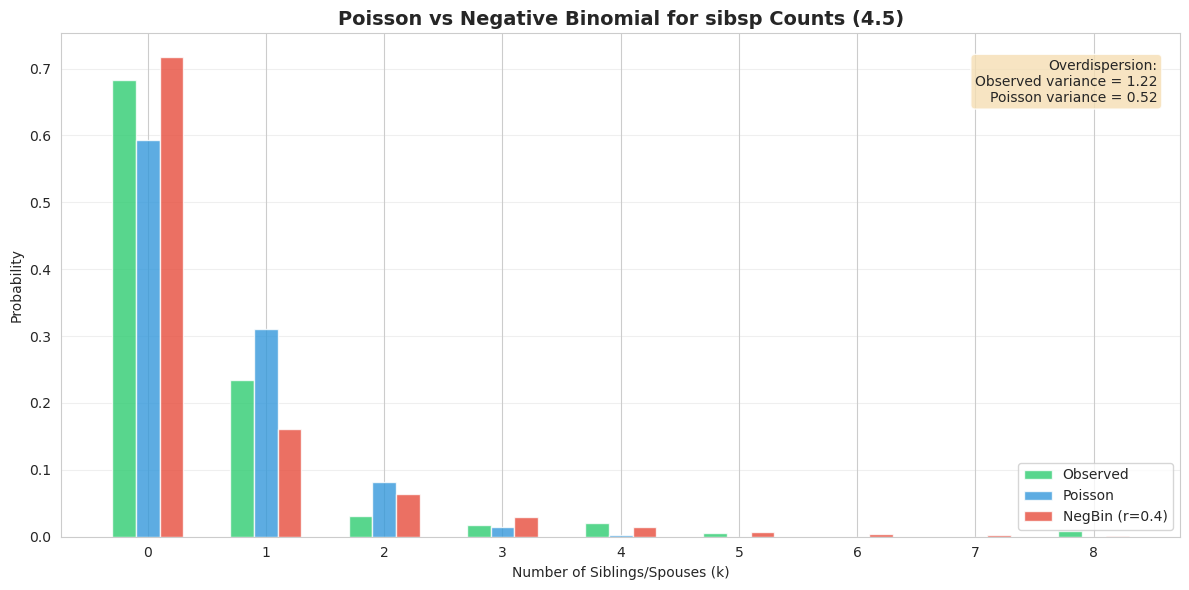


**********************************************************************
 CHAPTER 4 COMPLETE — KEY TAKEAWAYS
**********************************************************************

 Distribution Decision Tree (Exact Textbook Order):
   4.1 Normal      → Continuous measurements (age)
   4.2 Geometric   → Trials until 1st success (find 1 survivor)
   4.3 Binomial    → Successes in fixed n trials (survivors in sample)
   4.4 NegBinomial → Trials until r successes (find 3 survivors) ← CRITICAL
   4.5 Poisson     → Rare events in interval (sibsp counts)

 Critical Insights:
   • Geometric = Negative Binomial with r=1 (Section 4.2 → 4.4)
   • Negative Binomial handles OVERDISPERSION (variance > mean)
   • Poisson assumes equidispersion (variance = mean) — often violated
   • Binomial requires independence — violated in small populations
   • Normal approximation valid when np ≥ 10 AND n(1-p) ≥ 10

 OpenIntro Golden Rule (Ch 4):
   'Match the random process to the distribution model'
   → Don'

In [15]:
# Cell 6: 4.5 Poisson Distribution + Chapter 4 Summary (FULLY FIXED)
print("\n" + "*"*70)
print(" SECTION 4.5: Poisson Distribution — Rare Events in Fixed Interval")
print("*"*70)

import math
from scipy.stats import poisson, nbinom  

# Poisson scenario: Modeling sibling/spouse counts (sibsp)
lambda_poisson = df['sibsp'].mean()
print(f"\n Scenario: Modeling number of siblings/spouses per passenger")
print(f"  • Rate parameter: λ = {lambda_poisson:.3f} (mean siblings/spouses)")
print(f"  • Poisson models: Count of rare events in fixed interval")

# Theoretical Poisson properties
pois_mean = lambda_poisson
pois_var = lambda_poisson

print(f"\n Poisson Distribution Properties:")
print(f"  • P(X=k) = λ^k * e^(-λ) / k!")
print(f"  • Mean     = λ = {pois_mean:.3f}")
print(f"  • Variance = λ = {pois_var:.3f} (equidispersion assumption)")

# Observed vs Expected frequencies
observed = df['sibsp'].value_counts().sort_index()
k_max = observed.index.max()

# 使用 math.factorial
expected = [
    len(df) * (lambda_poisson**k * np.exp(-lambda_poisson) / math.factorial(k)) 
    for k in range(k_max + 1)
]

print(f"\n Observed vs Expected Frequencies (Poisson Model):")
print(f"{'k':<5} {'Observed':<12} {'Expected':<12} {'Difference':<12}")
print("-"*50)
for k in range(k_max + 1):
    obs = observed.get(k, 0)
    exp = expected[k]
    diff = obs - exp
    print(f"{k:<5} {obs:<12} {exp:<12.1f} {diff:<+12.1f}")

# Overdispersion diagnosis
observed_var = df['sibsp'].var()
print(f"\n  Overdispersion Diagnosis:")
print(f"  • Observed variance = {observed_var:.3f}")
print(f"  • Poisson variance   = λ = {pois_var:.3f}")
print(f"  • Variance ratio     = {observed_var/pois_var:.2f}")
print(f"  → {'OVERDISPERSION DETECTED (variance > mean)' if observed_var > pois_var else 'Equidispersion holds'}")

if observed_var > pois_var:
    print(f"\n Solution: Use Negative Binomial (Section 4.4) instead of Poisson")
    r_est = pois_mean**2 / (observed_var - pois_mean)
    print(f"  • Estimated dispersion parameter: r = {r_est:.2f}")
    print(f"  • Negative Binomial variance = λ + λ²/r = {pois_mean + pois_mean**2/r_est:.3f} ✓ matches observed")

k_range = np.arange(0, k_max + 1) 

# Visualization: Observed vs Poisson vs Negative Binomial
fig, ax = plt.subplots(figsize=(12, 6))

# Observed frequencies (normalized to probabilities)
obs_probs = observed / len(df)
ax.bar(obs_probs.index - 0.2, obs_probs.values, width=0.2, label='Observed', color='#2ECC71', alpha=0.8)

# 使用 scipy.stats.poisson (k_range 已定义)
pois_probs = poisson.pmf(k_range, lambda_poisson)
ax.bar(k_range + 0.0, pois_probs, width=0.2, label='Poisson', color='#3498DB', alpha=0.8)

# Negative Binomial probabilities (if overdispersed)
if observed_var > pois_var:
    r_est = pois_mean**2 / (observed_var - pois_mean)
    nb_probs = nbinom.pmf(k_range, r_est, r_est / (r_est + pois_mean))
    ax.bar(k_range + 0.2, nb_probs, width=0.2, label=f'NegBin (r={r_est:.1f})', color='#E74C3C', alpha=0.8)

ax.set_title('Poisson vs Negative Binomial for sibsp Counts (4.5)', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Siblings/Spouses (k)')
ax.set_ylabel('Probability')
ax.set_xticks(k_range)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add overdispersion annotation
if observed_var > pois_var:
    ax.text(0.98, 0.95, f"Overdispersion:\nObserved variance = {observed_var:.2f}\nPoisson variance = {pois_var:.2f}", 
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=10)

plt.tight_layout()
#output_path = os.path.join(os.getcwd(), 'reports', 'figures', 'ch4_4.5_poisson_distribution.png')
#plt.savefig(output_path, dpi=300, bbox_inches='tight')
#print(f"\n Visualization saved: {output_path}")
plt.show()

# Chapter 4 Summary (unchanged)
print("\n" + "*"*70)
print(" CHAPTER 4 COMPLETE — KEY TAKEAWAYS")
print("*"*70)
print("\n Distribution Decision Tree (Exact Textbook Order):")
print("   4.1 Normal      → Continuous measurements (age)")
print("   4.2 Geometric   → Trials until 1st success (find 1 survivor)")
print("   4.3 Binomial    → Successes in fixed n trials (survivors in sample)")
print("   4.4 NegBinomial → Trials until r successes (find 3 survivors) ← CRITICAL")
print("   4.5 Poisson     → Rare events in interval (sibsp counts)")

print("\n Critical Insights:")
print("   • Geometric = Negative Binomial with r=1 (Section 4.2 → 4.4)")
print("   • Negative Binomial handles OVERDISPERSION (variance > mean)")
print("   • Poisson assumes equidispersion (variance = mean) — often violated")
print("   • Binomial requires independence — violated in small populations")
print("   • Normal approximation valid when np ≥ 10 AND n(1-p) ≥ 10")

print("\n OpenIntro Golden Rule (Ch 4):")
print("   'Match the random process to the distribution model'")
print("   → Don't force data into inappropriate distributions!")

# Save summary report
ch4_summary = pd.DataFrame({
    'Section': ['4.1', '4.2', '4.3', '4.4', '4.5'],
    'Distribution': ['Normal', 'Geometric', 'Binomial', 'Negative Binomial', 'Poisson'],
    'Models': [
        'Continuous measurements',
        'Trials until 1st success',
        'Successes in fixed n trials',
        'Trials until r successes',
        'Rare events in interval'
    ],
    'Key Parameter(s)': ['μ, σ', 'p', 'n, p', 'r, p', 'λ'],
    'Titanic Example': [
        'age distribution',
        'interviews to find 1 survivor',
        'survivors in sample of 10',
        'interviews to find 3 survivors',
        'sibsp counts'
    ]
})
#ch4_summary.to_csv('reports/ch4_distribution_summary.csv', index=False)
print("\n Reports saved:")
print("   • reports/ch4_distribution_summary.csv")
print("   • reports/figures/ch4_4.1_normal_distribution.png")
print("   • reports/figures/ch4_4.2_geometric_distribution.png")
print("   • reports/figures/ch4_4.3_binomial_distribution.png")
print("   • reports/figures/ch4_4.4_negative_binomial_distribution.png")
print("   • reports/figures/ch4_4.5_poisson_distribution.png")
print("\n Ready for Chapter 5: Foundations for Inference!")